In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics

import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [133]:
data = pd.read_csv(r"bank_data_g18.csv")
data.head()

,CIF_Id,Income,Age,Married/Single,House_Ownership,Car_Ownership,Profession,City,Product,Amount,Overdue_days,Default_Flag
0,1,1347,28,single,rented,no,Mechanical_engineer,Sumgait,Tamkart taksit,3500,3,0
1,2,2697,39,single,rented,no,Software_Developer,Nakhchivan,Gundelik Telebat Krediti,9000,9,0
2,3,2939,55,married,rented,no,Technical_writer,Ganca,Tamkart taksit,10000,4,0
3,4,4648,48,single,rented,yes,Software_Developer,Nakhchivan,Gundelik Telebat Krediti,5000,2,1
4,5,3063,46,single,rented,no,Civil_servant,Sumgait,Gundelik Telebat Krediti,9000,3,1


In [134]:
data.describe(include='all')

,CIF_Id,Income,Age,Married/Single,House_Ownership,Car_Ownership,Profession,City,Product,Amount,Overdue_days,Default_Flag
count,252000.0000,252000.0000,252000.0000,252000,252000,252000,252000,252000,252000,252000.0000,252000.0000,252000.0000
unique,NaN,NaN,NaN,2,3,2,51,4,2,NaN,NaN,NaN
top,NaN,NaN,NaN,single,rented,no,Physician,Sumgait,Tamkart taksit,NaN,NaN,NaN
freq,NaN,NaN,NaN,226272,231898,176000,5957,63055,126182,NaN,NaN,NaN
mean,126000.5000,2749.7737,36.4933,NaN,NaN,NaN,NaN,NaN,NaN,5740.4603,6.3339,0.1230
std,72746.2783,1298.9643,10.9630,NaN,NaN,NaN,NaN,NaN,NaN,2428.8363,3.6471,0.3284
min,1.0000,500.0000,18.0000,NaN,NaN,NaN,NaN,NaN,NaN,2000.0000,0.0000,0.0000
25%,63000.7500,1623.0000,27.0000,NaN,NaN,NaN,NaN,NaN,NaN,3500.0000,3.0000,0.0000
50%,126000.5000,2751.0000,37.0000,NaN,NaN,NaN,NaN,NaN,NaN,5500.0000,6.0000,0.0000
75%,189000.2500,3874.0000,46.0000,NaN,NaN,NaN,NaN,NaN,NaN,8000.0000,9.0000,0.0000


In [135]:
data.dtypes

CIF_Id              int64
Income              int64
Age                 int64
Married/Single     object
House_Ownership    object
Car_Ownership      object
Profession         object
City               object
Product            object
Amount              int64
Overdue_days        int64
Default_Flag        int64
dtype: object

In [136]:
data = data.drop(data[['CIF_Id','Profession']],axis=1)

In [137]:
data.shape

(252000, 10)

In [138]:
data.isnull().sum()

Income             0
Age                0
Married/Single     0
House_Ownership    0
Car_Ownership      0
City               0
Product            0
Amount             0
Overdue_days       0
Default_Flag       0
dtype: int64

In [139]:
from scipy import stats


for i in data.columns:
    
    if data[i].dtype in ['int64', 'float64']:
        
        kstest_statistic, kstest_p_value = stats.kstest(data[i], 'norm')
        # 'norm' inside indicates that the test is comparing the distribution of the data against a normal distribution
        
        print(f'Column: {i}')
        print(f'Kolmogorov-Smirnov Test:')
        print(f'Test Statistic: {kstest_statistic}')
        print(f'p-value: {kstest_p_value}')
        
        if kstest_p_value > 0.05:
            print('Data looks normally distributed')
            print()
        else:
            print('Data does not look normally distributed')
            print()

Column: Income
Kolmogorov-Smirnov Test:
Test Statistic: 1.0
p-value: 0.0
Data does not look normally distributed

Column: Age
Kolmogorov-Smirnov Test:
Test Statistic: 1.0
p-value: 0.0
Data does not look normally distributed

Column: Amount
Kolmogorov-Smirnov Test:
Test Statistic: 1.0
p-value: 0.0
Data does not look normally distributed

Column: Overdue_days
Kolmogorov-Smirnov Test:
Test Statistic: 0.8874958997978526
p-value: 0.0
Data does not look normally distributed

Column: Default_Flag
Kolmogorov-Smirnov Test:
Test Statistic: 0.5
p-value: 0.0
Data does not look normally distributed



In [140]:
def target_correlation(data, target, threshold=0.000001):
    corr_matrix = data.corr(method='spearman')
    
    target_correlations = corr_matrix[target].abs() > threshold
    
    variables_explaining_target = target_correlations[target_correlations].index.tolist()

    variables_explaining_target.remove(target)
    
    result_explaining_target = pd.DataFrame(
    {'Variable': variables_explaining_target,
    'Correlation with Target': corr_matrix.loc[variables_explaining_target, target]})
    
    result_explaining_target.reset_index(drop=True, inplace=True)
    
    return result_explaining_target


target_result = target_correlation(data, 'Default_Flag')

target_result

/var/folders/br/yvkmbr3121n8fd9q6wdmyqfm0000gp/T/ipykernel_77154/2995041591.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr(method='spearman')


,Variable,Correlation with Target
0,Income,0.0009
1,Age,-0.0001
2,Amount,-0.0017
3,Overdue_days,-0.0185


In [141]:

def intercorrelation(data, target, threshold=0.5):
    corr_matrix = data.drop(columns=[target]).corr(method='spearman')
    
    highly_correlated_variables = (np.abs(corr_matrix) > threshold) & (corr_matrix != 1.0)
    
    independent_variable_pairs = np.where(highly_correlated_variables)
    
    correlated_pairs_set = set()
   
    for var1, var2 in zip(independent_variable_pairs[0], independent_variable_pairs[1]):

        if var1 < var2:
            correlated_pairs_set.add((corr_matrix.index[var1], corr_matrix.columns[var2]))
        else:
            correlated_pairs_set.add((corr_matrix.index[var2], corr_matrix.columns[var1]))
            
   # print(correlated_pairs_set)
    
    result_intercorrelated_independent = pd.DataFrame(list(correlated_pairs_set), columns=['Variable 1', 'Variable 2'])
    
    return result_intercorrelated_independent

# Example usage
intercorrelated_result = intercorrelation(data, 'Default_Flag')
intercorrelated_result


/var/folders/br/yvkmbr3121n8fd9q6wdmyqfm0000gp/T/ipykernel_77154/1618670445.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.drop(columns=[target]).corr(method='spearman')


,Variable 1,Variable 2


In [142]:
target_result.Variable.tolist()

['Income', 'Age', 'Amount', 'Overdue_days']

In [143]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data, variables):
    vif_data = data[variables]
    vif_values = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
    vif_result = pd.DataFrame({'VIF': vif_values, 'Features': variables})
    return vif_result


vif_result = calculate_vif(data, [ 
                                        'Income',
                                        'Age', 
                                        'Amount', 
                                        'Overdue_days'
                                        ])

vif_result


,VIF,Features
0,4.4943,Income
1,6.7544,Age
2,5.1407,Amount
3,3.5370,Overdue_days


In [144]:
data.columns

Index(['Income', 'Age', 'Married/Single', 'House_Ownership', 'Car_Ownership',
       'City', 'Product', 'Amount', 'Overdue_days', 'Default_Flag'],
      dtype='object')

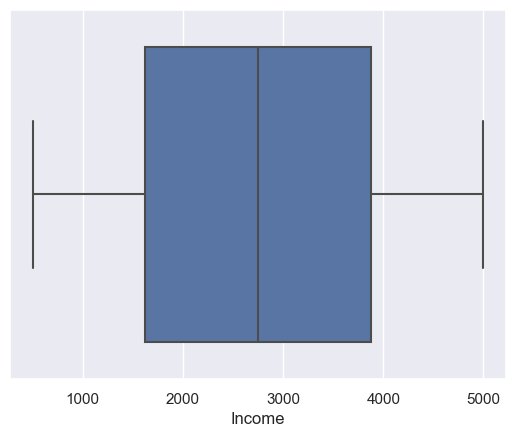

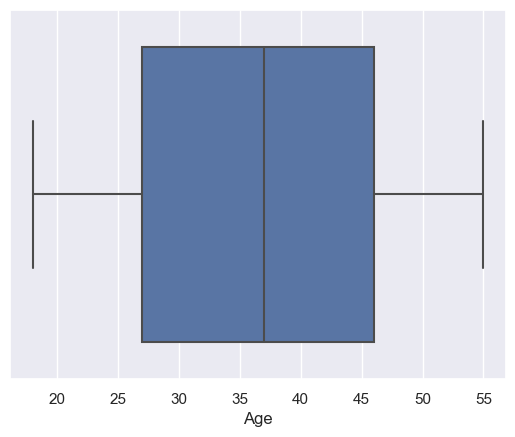

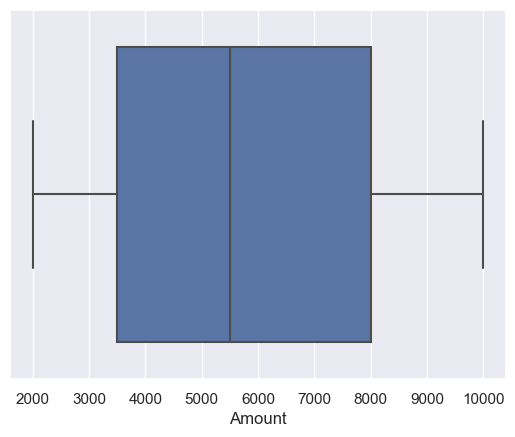

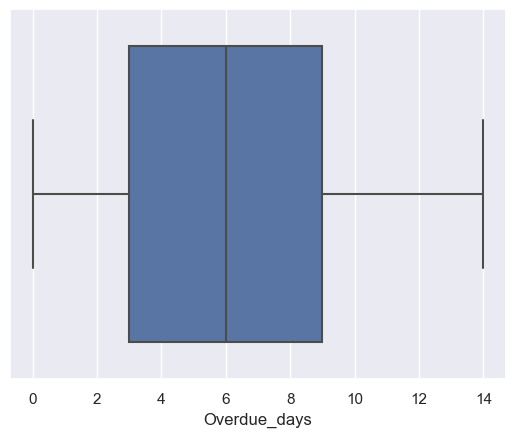

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

for i in data[['Income', 'Age','Amount', 'Overdue_days']]:
    sns.boxplot(data=data,x=data[i])
    plt.show()
    

In [146]:
data.columns

Index(['Income', 'Age', 'Married/Single', 'House_Ownership', 'Car_Ownership',
       'City', 'Product', 'Amount', 'Overdue_days', 'Default_Flag'],
      dtype='object')

In [147]:
for i in data.columns:
    if data[i].dtypes!=object:
        print(i)

Income
Age
Amount
Overdue_days
Default_Flag


In [148]:
for i in data.columns:
    if data[i].dtypes==object:
        print(i)

Married/Single
House_Ownership
Car_Ownership
City
Product


In [149]:
import numpy as np
import pandas as pd

for var in data.columns[:-1]:
    if data[var].dtypes != object:
        
        q1 = data[var].quantile(0.25)
        q2 = data[var].quantile(0.5)
        q3 = data[var].quantile(0.75)

        ranges = [-np.inf, q1, q2, q3, np.inf]
        data['category_' + var] = pd.cut(data[var], bins=ranges, duplicates='drop')

        grouped = data.groupby(['category_' + var, 'Default_Flag'])['Default_Flag'].count().unstack().reset_index()

        grouped['positive_prop'] = grouped[0] / grouped[0].sum()
        grouped['negative_prop'] = grouped[1] / grouped[1].sum()

        grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])
        
        grouped.rename(columns={'woe': var + '_woe'}, inplace=True)
        data = data.merge(grouped[['category_' + var, var + '_woe']], how='left', on='category_' + var)

In [150]:
data

,Income,Age,Married/Single,House_Ownership,Car_Ownership,City,Product,Amount,Overdue_days,Default_Flag,category_Income,Income_woe,category_Age,Age_woe,category_Amount,Amount_woe,category_Overdue_days,Overdue_days_woe
0,1347,28,single,rented,no,Sumgait,Tamkart taksit,3500,3,0,"(-inf, 1623.0]",-0.0078,"(27.0, 37.0]",-0.0130,"(-inf, 3500.0]",-0.0059,"(-inf, 3.0]",-0.1281
1,2697,39,single,rented,no,Nakhchivan,Gundelik Telebat Krediti,9000,9,0,"(1623.0, 2751.0]",0.0146,"(37.0, 46.0]",0.0028,"(8000.0, inf]",0.0090,"(6.0, 9.0]",0.0862
2,2939,55,married,rented,no,Ganca,Tamkart taksit,10000,4,0,"(2751.0, 3874.0]",0.0069,"(46.0, inf]",0.0020,"(8000.0, inf]",0.0090,"(3.0, 6.0]",0.0506
3,4648,48,single,rented,yes,Nakhchivan,Gundelik Telebat Krediti,5000,2,1,"(3874.0, inf]",-0.0136,"(46.0, inf]",0.0020,"(3500.0, 5500.0]",-0.0036,"(-inf, 3.0]",-0.1281
4,3063,46,single,rented,no,Sumgait,Gundelik Telebat Krediti,9000,3,1,"(2751.0, 3874.0]",0.0069,"(37.0, 46.0]",0.0028,"(8000.0, inf]",0.0090,"(-inf, 3.0]",-0.1281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,2176,25,single,rented,no,Ganca,Tamkart taksit,3500,6,0,"(1623.0, 2751.0]",0.0146,"(-inf, 27.0]",0.0086,"(-inf, 3500.0]",-0.0059,"(3.0, 6.0]",0.0506
251996,544,26,single,rented,no,Ganca,Gundelik Telebat Krediti,7500,6,0,"(-inf, 1623.0]",-0.0078,"(-inf, 27.0]",0.0086,"(5500.0, 8000.0]",0.0027,"(3.0, 6.0]",0.0506
251997,4769,34,single,rented,no,Ganca,Gundelik Telebat Krediti,8500,7,0,"(3874.0, inf]",-0.0136,"(27.0, 37.0]",-0.0130,"(8000.0, inf]",0.0090,"(6.0, 9.0]",0.0862
251998,1359,47,single,rented,no,Ganca,Tamkart taksit,7000,0,0,"(-inf, 1623.0]",-0.0078,"(46.0, inf]",0.0020,"(5500.0, 8000.0]",0.0027,"(-inf, 3.0]",-0.1281


In [151]:
for var in data.columns:
    if data[var].dtypes==object:
        
        grouped = data.groupby([var, 'Default_Flag'])['Default_Flag'].count().unstack().reset_index()

        grouped['positive_prop'] = grouped[0] / grouped[0].sum()
        grouped['negative_prop'] = grouped[1] / grouped[1].sum()

        grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])

        grouped.rename(columns={'woe':var+'_woe'}, inplace=True)
        data = data.merge(grouped[[var,var+'_woe']], how='left', on=var)

data

,Income,Age,Married/Single,House_Ownership,Car_Ownership,City,Product,Amount,Overdue_days,Default_Flag,category_Income,Income_woe,category_Age,Age_woe,category_Amount,Amount_woe,category_Overdue_days,Overdue_days_woe,Married/Single_woe,House_Ownership_woe,Car_Ownership_woe,City_woe,Product_woe
0,1347,28,single,rented,no,Sumgait,Tamkart taksit,3500,3,0,"(-inf, 1623.0]",-0.0078,"(27.0, 37.0]",-0.0130,"(-inf, 3500.0]",-0.0059,"(-inf, 3.0]",-0.1281,-0.0215,-0.0237,-0.0472,-0.0142,-0.0047
1,2697,39,single,rented,no,Nakhchivan,Gundelik Telebat Krediti,9000,9,0,"(1623.0, 2751.0]",0.0146,"(37.0, 46.0]",0.0028,"(8000.0, inf]",0.0090,"(6.0, 9.0]",0.0862,-0.0215,-0.0237,-0.0472,0.0028,0.0048
2,2939,55,married,rented,no,Ganca,Tamkart taksit,10000,4,0,"(2751.0, 3874.0]",0.0069,"(46.0, inf]",0.0020,"(8000.0, inf]",0.0090,"(3.0, 6.0]",0.0506,0.2059,-0.0237,-0.0472,0.0233,-0.0047
3,4648,48,single,rented,yes,Nakhchivan,Gundelik Telebat Krediti,5000,2,1,"(3874.0, inf]",-0.0136,"(46.0, inf]",0.0020,"(3500.0, 5500.0]",-0.0036,"(-inf, 3.0]",-0.1281,-0.0215,-0.0237,0.1164,0.0028,0.0048
4,3063,46,single,rented,no,Sumgait,Gundelik Telebat Krediti,9000,3,1,"(2751.0, 3874.0]",0.0069,"(37.0, 46.0]",0.0028,"(8000.0, inf]",0.0090,"(-inf, 3.0]",-0.1281,-0.0215,-0.0237,-0.0472,-0.0142,0.0048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,2176,25,single,rented,no,Ganca,Tamkart taksit,3500,6,0,"(1623.0, 2751.0]",0.0146,"(-inf, 27.0]",0.0086,"(-inf, 3500.0]",-0.0059,"(3.0, 6.0]",0.0506,-0.0215,-0.0237,-0.0472,0.0233,-0.0047
251996,544,26,single,rented,no,Ganca,Gundelik Telebat Krediti,7500,6,0,"(-inf, 1623.0]",-0.0078,"(-inf, 27.0]",0.0086,"(5500.0, 8000.0]",0.0027,"(3.0, 6.0]",0.0506,-0.0215,-0.0237,-0.0472,0.0233,0.0048
251997,4769,34,single,rented,no,Ganca,Gundelik Telebat Krediti,8500,7,0,"(3874.0, inf]",-0.0136,"(27.0, 37.0]",-0.0130,"(8000.0, inf]",0.0090,"(6.0, 9.0]",0.0862,-0.0215,-0.0237,-0.0472,0.0233,0.0048
251998,1359,47,single,rented,no,Ganca,Tamkart taksit,7000,0,0,"(-inf, 1623.0]",-0.0078,"(46.0, inf]",0.0020,"(5500.0, 8000.0]",0.0027,"(-inf, 3.0]",-0.1281,-0.0215,-0.0237,-0.0472,0.0233,-0.0047


In [152]:
data.Default_Flag.value_counts()

0    221004
1     30996
Name: Default_Flag, dtype: int64

In [153]:
data.columns

Index(['Income', 'Age', 'Married/Single', 'House_Ownership', 'Car_Ownership',
       'City', 'Product', 'Amount', 'Overdue_days', 'Default_Flag',
       'category_Income', 'Income_woe', 'category_Age', 'Age_woe',
       'category_Amount', 'Amount_woe', 'category_Overdue_days',
       'Overdue_days_woe', 'Married/Single_woe', 'House_Ownership_woe',
       'Car_Ownership_woe', 'City_woe', 'Product_woe'],
      dtype='object')

In [154]:
woe_features = data.filter(regex='_woe$', axis=1)
woe_features.columns

Index(['Income_woe', 'Age_woe', 'Amount_woe', 'Overdue_days_woe',
       'Married/Single_woe', 'House_Ownership_woe', 'Car_Ownership_woe',
       'City_woe', 'Product_woe'],
      dtype='object')

In [172]:
x1 = data[['Income_woe', 'Age_woe', 'Amount_woe', 'Overdue_days_woe',
       'Married/Single_woe', 'House_Ownership_woe', 'Car_Ownership_woe',
       'City_woe', 'Product_woe']]
y = data['Default_Flag']

In [176]:
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.3, random_state=42)

In [177]:
def evaluate(model, X_test, y_test):
    
    y_pred = model.predict(X_test)
    
    y_prob = model.predict_proba(X_test)[:,1]

    roc_prob = roc_auc_score(y_test, y_prob)
    
    gini_prob = roc_prob*2-1
    
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print('Model Performance')

    print('Gini prob is', gini_prob*100)
    print(confusion_matrix)
    print(report)

In [178]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [179]:
result = evaluate(clf, X_test, y_test)

Model Performance
Gini prob is 9.10873432635466
[[66329     0]
 [ 9271     0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66329
           1       0.00      0.00      0.00      9271

    accuracy                           0.88     75600
   macro avg       0.44      0.50      0.47     75600
weighted avg       0.77      0.88      0.82     75600



/Users/personal_mac/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/personal_mac/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/personal_mac/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


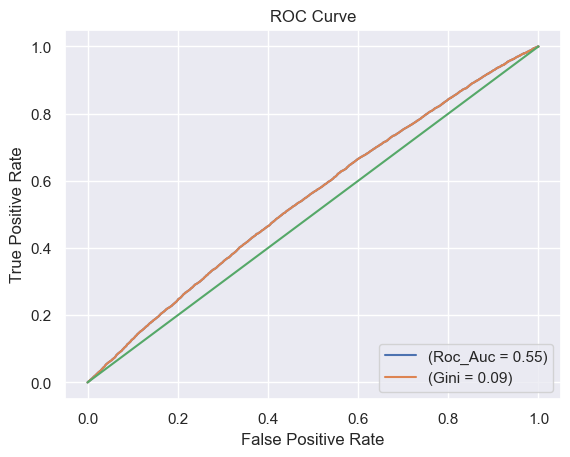

In [180]:
y_prob = clf.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

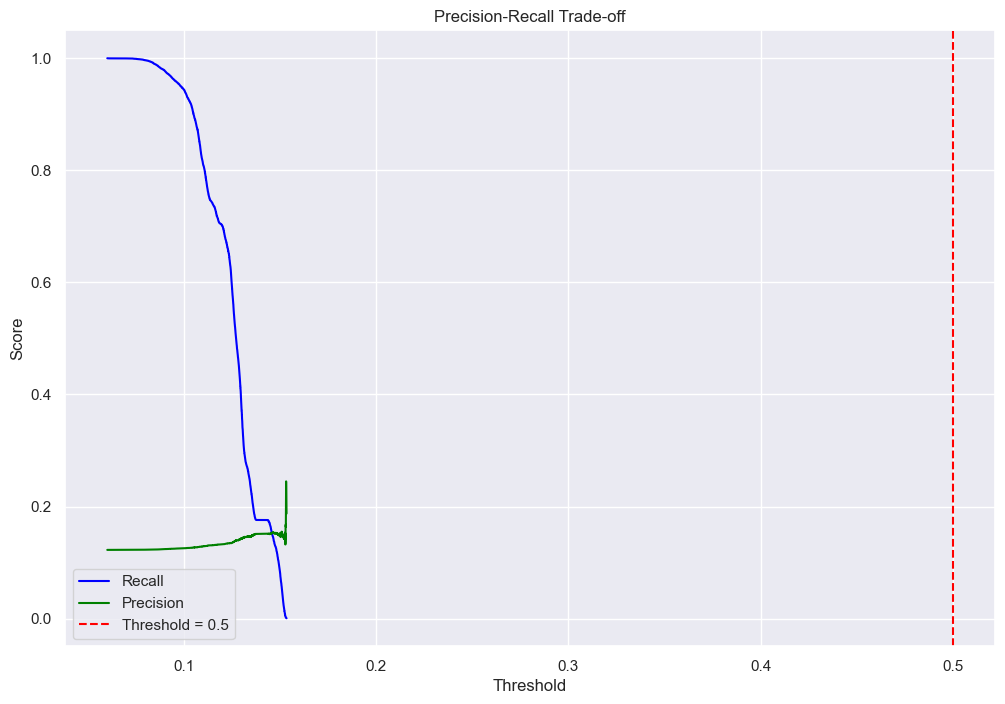

In [181]:
from sklearn.metrics import precision_recall_curve

y_prob = clf.predict_proba(X_test)[:,1]

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(12, 8))
plt.plot(thresholds, recall[:-1], label='Recall', color='blue')
plt.plot(thresholds, precision[:-1], label='Precision', color='green')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Trade-off')
plt.axvline(x=0.5, color='red', linestyle='--', label='Threshold = 0.5')
plt.legend()
plt.grid(True)
plt.show()

In [182]:
def evaluate_custom(model, X_test, y_test):
    
    y_pred = model.predict(X_test)
    
    y_prob = model.predict_proba(X_test)[:,1]
    
    custom_threshold = 0.14

    y_pred_custom_main = (y_prob >= custom_threshold).astype(int)

    roc_prob = roc_auc_score(y_test, y_pred_custom_main)
    
    gini_prob = roc_prob*2-1
    
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred_custom_main)
    report = classification_report(y_test, y_pred_custom_main)
    
    print('Model Performance')

    print('Gini prob is', gini_prob*100)
    print(confusion_matrix)
    print(report)

In [183]:
evaluate_custom(clf, X_test, y_test)

Model Performance
Gini prob is 3.8099156566267167
[[59397  6932]
 [ 8018  1253]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     66329
           1       0.15      0.14      0.14      9271

    accuracy                           0.80     75600
   macro avg       0.52      0.52      0.52     75600
weighted avg       0.79      0.80      0.80     75600



### When the class_weights = ‘balanced’, the model automatically assigns the class weights inversely proportional to their respective frequencies.


- weight = n_samples_overall / (n_classes * n_samples_of_class)

Overall sample is: 252000

From our model there are 2 classes:

- 0 is   221004
- 1  is   30996

weight for 0 is:

- weight_0 = 252000 / 2 * 221004

weight for 1 is:

- weight_1 = 252000 / 2 * 30996

### We don’t use the mean squared error as the cost function for the logistic regression because instead of fitting a straight line, we use the sigmoid curve as the prediction function.

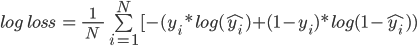

### after balancing data with weights

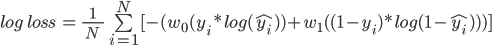

In [165]:
clf_balanced = LogisticRegression(class_weight='balanced')
clf_balanced.fit(X_train, y_train)


LogisticRegression(class_weight='balanced')

In [166]:
result_balanced = evaluate(clf_balanced, X_test, y_test)

Model Performance
Gini prob is 9.044428789233038
[[27697 38632]
 [ 3278  5993]]
              precision    recall  f1-score   support

           0       0.89      0.42      0.57     66329
           1       0.13      0.65      0.22      9271

    accuracy                           0.45     75600
   macro avg       0.51      0.53      0.40     75600
weighted avg       0.80      0.45      0.53     75600



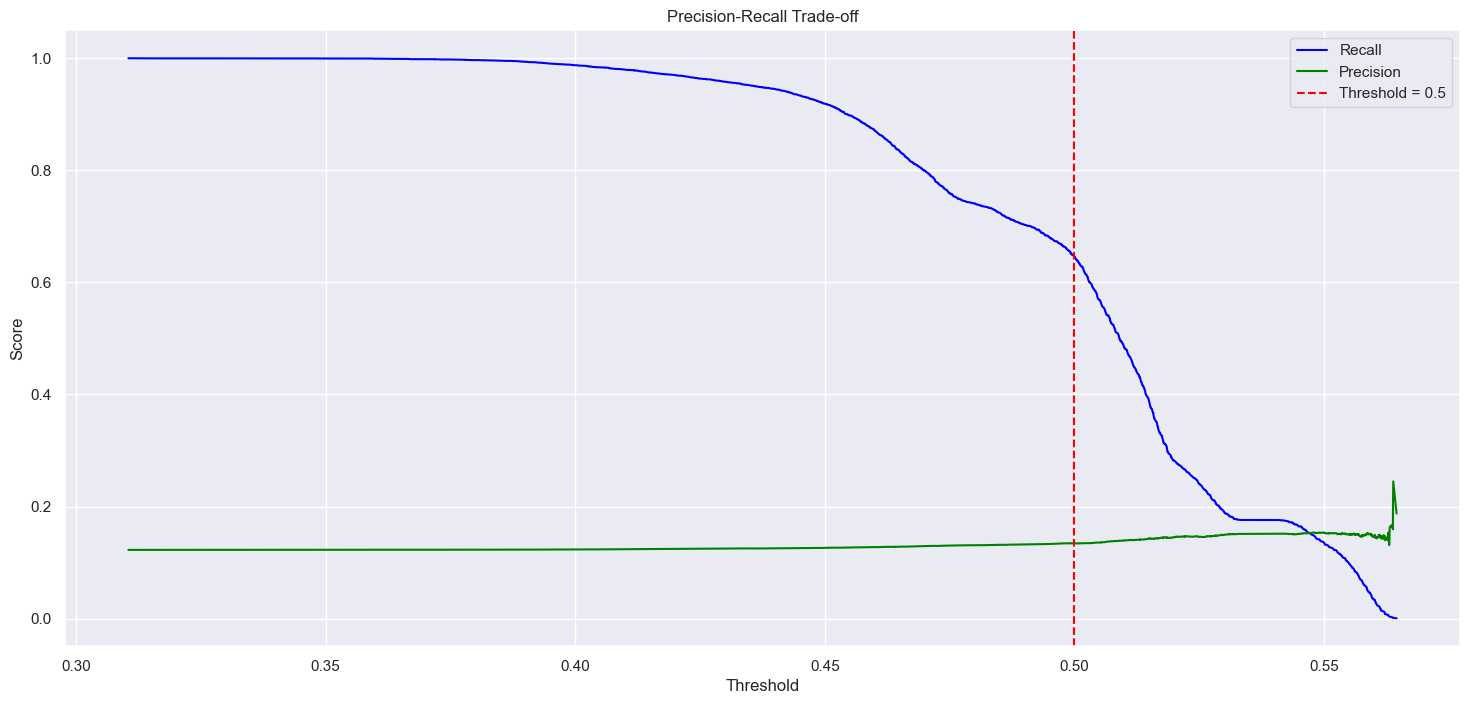

In [167]:
from sklearn.metrics import precision_recall_curve

y_prob_balanced = clf_balanced.predict_proba(X_test)[:,1]

precision, recall, thresholds = precision_recall_curve(y_test, y_prob_balanced)

plt.figure(figsize=(18, 8))
plt.plot(thresholds, recall[:-1], label='Recall', color='blue')
plt.plot(thresholds, precision[:-1], label='Precision', color='green')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Trade-off')
plt.axvline(x=0.5, color='red', linestyle='--', label='Threshold = 0.5')
plt.legend()
plt.grid(True)
plt.show()

In [168]:
def evaluate_custom_balanced(model, X_test, y_test):
    
    y_pred = model.predict(X_test)
    
    y_prob = model.predict_proba(X_test)[:,1]
    
    custom_threshold = 0.55

    y_pred_custom_balanced = (y_prob >= custom_threshold).astype(int)

    roc_prob = roc_auc_score(y_test, y_pred_custom_balanced)
    
    gini_prob = roc_prob*2-1
    
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred_custom)
    report = classification_report(y_test, y_pred_custom)
    
    print('Model Performance')

    print('Gini prob is', gini_prob*100)
    print(confusion_matrix)
    print(report)

In [169]:
evaluate_custom_balanced(clf_balanced, X_test, y_test)

Model Performance
Gini prob is 3.0643286663518676
[[59397  6932]
 [ 8018  1253]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     66329
           1       0.15      0.14      0.14      9271

    accuracy                           0.80     75600
   macro avg       0.52      0.52      0.52     75600
weighted avg       0.79      0.80      0.80     75600



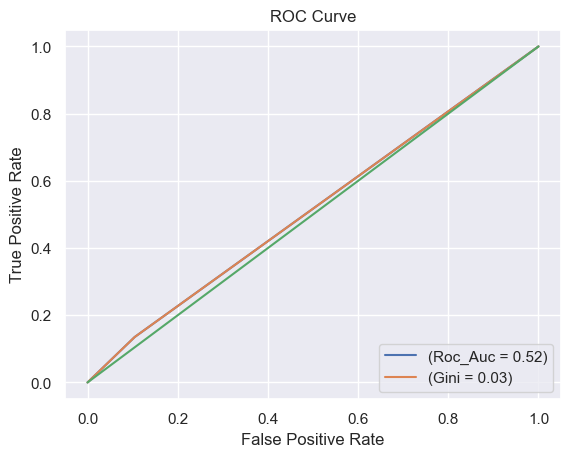

In [170]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob = clf_balanced.predict_proba(X_test)[:,1]

custom_threshold = 0.55

y_pred_custom = (y_prob >= custom_threshold).astype(int)

roc_auc = roc_auc_score(y_test, y_pred_custom)
gini = (2*roc_auc_score(y_test, y_pred_custom))-1

fpr, tpr, thresholds = roc_curve(y_test, y_pred_custom)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

In [171]:
variables = []
train_gini_scores = []
test_gini_scores = []


for i in X_train.columns:
    X_train_single_var = X_train[[i]]
    X_test_single_var = X_test[[i]]

    
    clf.fit(X_train_single_var, y_train)
    
    y_pred_train_single_var = clf.predict_proba(X_train_single_var)[:, 1]

    train_roc = roc_auc_score(y_train, y_pred_train_single_var)
    train_gini = 2 * train_roc - 1

    
    y_pred_test_single_var = clf.predict_proba(X_test_single_var)[:, 1]

    test_roc = roc_auc_score(y_test, y_pred_test_single_var)
    test_gini = 2 * test_roc - 1


    variables.append(i)
    train_gini_scores.append(train_gini)
    test_gini_scores.append(test_gini)


results_df = pd.DataFrame({
                            'Variable': variables,
                            'Train Gini': train_gini_scores,
                            'Test Gini': test_gini_scores
                        })

results_df_sorted = results_df.sort_values(by='Test Gini', ascending=False)

pd.options.display.float_format = '{:.4f}'.format

results_df_sorted


,Variable,Train Gini,Test Gini
3,Overdue_days_woe,0.0418,0.0474
6,Car_Ownership_woe,0.0349,0.0306
5,House_Ownership_woe,0.0202,0.0267
4,Married/Single_woe,0.0205,0.0171
1,Age_woe,0.0004,0.0132
0,Income_woe,0.0039,0.0115
8,Product_woe,0.0041,-0.0016
7,City_woe,0.0122,-0.0021
2,Amount_woe,0.0067,-0.0054
